In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

# Predicting the weight of ROUSes using Linear Regression
Using other data we have in the table, we want to predict the weight of ROUSes.

In [2]:
rouses = pd.read_csv('ROUSes.csv')
print(rouses.shape)
rouses.head()

(29, 4)


,Age,Length,Weight,Temperament
0,9.5,4.1,93.2,Sleepy
1,12.0,4.1,97.7,Moody
2,14.5,4.6,120.3,No-nonsense
3,7.0,3.3,60.4,Moody
4,10.0,3.5,75.3,No-nonsense


`Age` seems to have a decently linear correlation with `Weight`.  `Length` looks more like a square relationship.  So we'll try using `Age` to predict `Weight`.  Let's drop the other columns.

In [3]:
rouses = rouses.drop(columns=['Temperament','Length']) # drop the column 'Name'
rouses.head()

,Age,Weight
0,9.5,93.2
1,12.0,97.7
2,14.5,120.3
3,7.0,60.4
4,10.0,75.3


**Separate X and y**

In [4]:
y = rouses['Weight']
X = rouses.drop(columns=['Weight'])
print(X.shape, y.shape)

(29, 1) (29,)


## Training or fitting a model 

To use a machine learning model from `scikit-learn`, you should import the relevant model.

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)
print('R^2:',lr.score(X, y))

print("coefficients:", lr.coef_)
print("intercept:", lr.intercept_)

coefs = pd.DataFrame(lr.coef_, 
                     index=lr.feature_names_in_, 
                    columns=['Coefficient vals'])
coefs

R^2: 0.9779712473095585
coefficients: [6.51178526]
intercept: 14.06838658038437


,Coefficient vals
Age,6.511785


For linear regression a "score" (the R2 value) near 1 is what we are hoping for, and 0 is the worst result.  So our model is doing a very good job at predicting the data!  The coefficient tells us how much `Weight` change to expect with every unit change of `Age`.

To visualize our line, we can plug some values in and have their outputs predicted:

In [6]:
predict_inputs = pd.DataFrame({'Age':[1,55]})
predictions = lr.predict(predict_inputs)
predictions

array([ 20.58017184, 372.21657601])

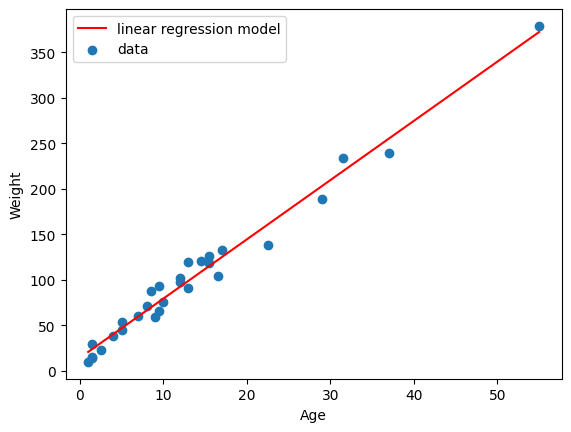

In [7]:
fig, ax = plt.subplots(1)

ax.plot([1,55], [predictions[0], predictions[1]], color = "red", label = "linear regression model")
ax.scatter(rouses['Age'], rouses['Weight'], label = "data")
ax.set(xlabel='Age', ylabel='Weight')
plt.legend()

Indeed, it looks like this line is a very good fit to our data!

## Multiple linear regression

Use both `Age` and `Length` to predict `Weight`.

In [8]:
from sklearn.linear_model import LinearRegression
rouses_full = pd.read_csv('ROUSes.csv')
print(rouses_full.shape)
rouses_full.describe()

(29, 4)


,Age,Length,Weight
count,29.000000,29.000000,29.000000
mean,13.362069,3.841379,101.079310
std,12.042259,1.551386,79.294854
min,1.000000,1.100000,9.600000
25%,5.000000,3.100000,53.500000
50%,10.000000,3.900000,91.100000
75%,15.500000,4.600000,120.300000
max,55.000000,8.000000,378.900000


Note from the table above that `Age` and `Length` have different ranges/scales.
We'll see how that affects the final model and interpretation of coefficients.

In [9]:
def rouses_lr(rouses, seed=0):
    y = rouses['Weight']
    X = rouses.drop(columns=['Weight'])
    
    lr = LinearRegression(fit_intercept=True)
    lr.fit(X, y)
    
    coefs = pd.DataFrame(lr.coef_, 
                         index=lr.feature_names_in_, 
                        columns=['Coefficient vals'])
    
    coefs.loc['R^2'] = lr.score(X, y)

    return coefs


In [10]:
rouses = rouses_full.filter(['Age', 'Weight', 'Length'])
seed = 100

#######
# This is called "standardization"
# make all features mean 0 and std 1
rouses_standardized = rouses - rouses.mean() # mean 0
rouses_standardized = rouses_standardized/rouses_standardized.std() # std = 1
#######

#######
# This is called "min-max scaling"
# make all values fall between 0 and 1
ranges = (rouses.max() - rouses.min()) # calculate the range
rouses_minmax = (rouses - rouses.min())/ranges 
#######

results = pd.DataFrame()
for df, name in zip([rouses, rouses_standardized, rouses_minmax], 
                    ["Unnormalized", "Standardized", "Min-max scaled"]):
    res = rouses_lr(df, seed)
    res = res.rename(columns ={'Coefficient vals': name})
    results = pd.concat((results, res), axis=1)
results

,Unnormalized,Standardized,Min-max scaled
Age,4.783416,0.726442,0.699444
Length,14.359994,0.280950,0.268302
R^2,0.988007,0.988007,0.988007


In [11]:
rouses_minmax.describe()

,Age,Weight,Length
count,29.000000,29.000000,29.000000
mean,0.228927,0.247710,0.397301
std,0.223005,0.214717,0.224839
min,0.000000,0.000000,0.000000
25%,0.074074,0.118874,0.289855
50%,0.166667,0.220688,0.405797
75%,0.268519,0.299756,0.507246
max,1.000000,1.000000,1.000000


In [12]:
rouses_standardized.describe()

,Age,Weight,Length
count,2.900000e+01,2.900000e+01,2.900000e+01
mean,-2.201304e-17,-7.273875e-17,3.014830e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.026557e+00,-1.153660e+00,-1.767052e+00
25%,-6.943937e-01,-6.000302e-01,-4.778820e-01
50%,-2.791892e-01,-1.258507e-01,3.778602e-02
75%,1.775357e-01,2.423952e-01,4.889955e-01
max,3.457651e+00,3.503641e+00,2.680584e+00


# Revisit Titanic data: predict survival of Titanic using decision trees

In [13]:
titanic = pd.read_csv('titanic.csv')
titanic = titanic.drop(['Name'], axis=1)
is_F = (titanic['Sex'] == 'female') # array of True and False
titanic['Sex'] = is_F.astype(int) # 1 = female, 0 = male
print(titanic.shape)
titanic.head()

(887, 7)


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


## Train test split
The next thing to do is to randomly split the sample into train and test groups and use training set for training and test set for evaluating the trained/fitted model.  

In [14]:
train = titanic.sample(frac= 0.8) # 80% rows for training
test = titanic.drop(index=train.index) # rest of rows for testing
print(train.shape, test.shape)

(710, 7) (177, 7)


Then we separate out the target data Survived from the predictor data (everything else).

In [15]:
y_train = train['Survived']
X_train = train.drop(columns=['Survived'])
print(X_train.shape, y_train.shape)

y_test = test['Survived']
X_test = test.drop(columns=['Survived']) 
print(X_test.shape, y_test.shape)

(710, 6) (710,)
(177, 6) (177,)


## Fit a decision tree and evaluate it
To use a machine learning model from `scikit-learn`, you should import the relevant model. 

In [16]:
from sklearn import tree 
T = tree.DecisionTreeClassifier(max_depth=2) 
T.fit(X_train, y_train)
print("Training accuracy:", T.score(X_train, y_train))
print("Test accuracy:", T.score(X_test, y_test))

Training accuracy: 0.7943661971830986
Test accuracy: 0.751412429378531


## Visualize the tree
We can also visualize the trained decision tree. The `tree` module of `scikit-learn` provides a convenient method.

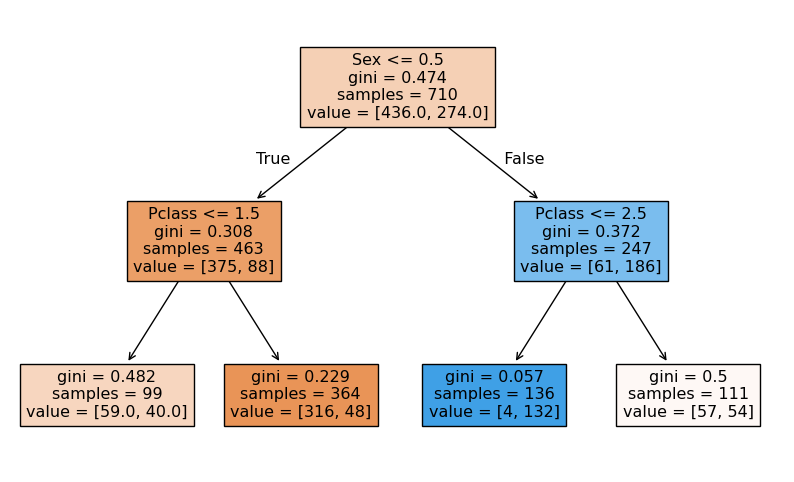

In [17]:
fig, ax = plt.subplots(1, figsize = (10, 6))
p = tree.plot_tree(T, 
                   filled=True, 
                   feature_names=X_train.columns)

Samples in each block indicate the number of training examples (or data points) that reached this node. Value is a list showing how many of those samples belong to each class. The class for the node is the one with the majority of samples.